# Summary Statistic for Categorical Variable

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv('nyc_tree_census.csv')
print(df.shape)
df.head(3)

(50000, 6)


,tree_id,trunk_diam,status,health,spc_common,neighborhood
0,199250,8,Alive,Good,crab apple,Lincoln Square
1,136891,17,Alive,Good,honeylocust,East Harlem North
2,200218,3,Alive,Good,ginkgo,Chinatown


## Ordinal Category
Unordered, no order categorical variable.

In [11]:
# getting the mode (most common)
df.spc_common.value_counts()

London planetree    6472
honeylocust         4798
Callery pear        4189
pin oak             3792
Norway maple        2477
                    ... 
black maple            3
Scots pine             3
smoketree              2
sassafras              2
Ohio buckeye           2
Name: spc_common, Length: 131, dtype: int64

In [53]:
top_10 = df['spc_common'].value_counts()[:10]


pandas.core.series.Series

<AxesSubplot:xlabel='spc_common', ylabel='count'>

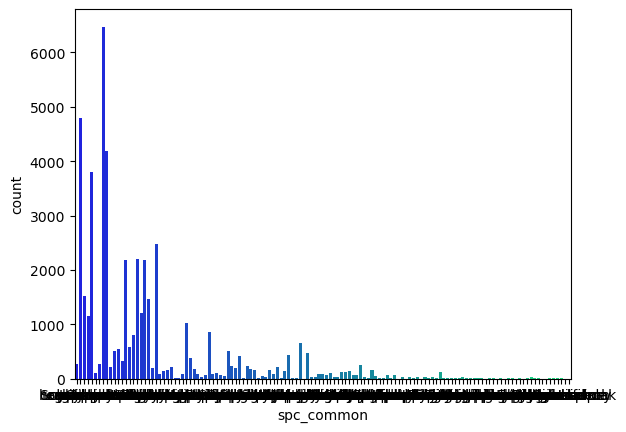

In [51]:
# top 10 'spicies'


sns.countplot(x='spc_common', data=df, palette='winter')


In [4]:
# Sample Code:
correct_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
 # df['education'] = pd.Categorical(df['education'], correct_order, ordered=True)

Nominal Categories

We can